In [18]:
%pip install ydata-profiling

  Using cached ydata_profiling-4.16.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached PyYAML-6.0.2-cp312-cp312-win_amd64.whl.metadata (2.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached phik-0.12.4-cp312-cp312-win_amd64.whl.metadata (5.6 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached typeguard-4.4.2-py3-none-any.whl.metadata (3.8 kB)
  Using cached ImageHash-4.3.1-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached wordcloud-1.9.4-cp312-cp312-win_amd64.w

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'c:\\users\\ewotjul\\onedrive - ericsson\\desktop\\fairness\\venv\\lib\\site-packages\\matplotlib\\backends\\_backend_agg.cp312-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Importação de Bibliotecas e Carregamento dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

# Carregamento do dataset
df = pd.read_csv('./../data/SouthGermanCredit.asc', delimiter=' ')


## 2. Análise Exploratória de Dados (EDA)
Distribuição da variável alvo (credit_risk)

Distribuição de atributos sensíveis, como age e foreign_worker

Análise de correlação entre variáveis

In [2]:
columns_en = [
    "checking_account",        # laufkont
    "duration_month",          # laufzeit
    "credit_history",          # moral
    "purpose",                 # verw
    "credit_amount",           # hoehe
    "savings_account",         # sparkont
    "employment_duration",     # beszeit
    "installment_rate",        # rate
    "personal_status_sex",     # famges
    "guarantor",               # buerge
    "residence_duration",      # wohnzeit
    "property",                # verm
    "age",                     # alter
    "other_installment_plans",# weitkred
    "housing",                 # wohn
    "number_existing_credits",# bishkred
    "job",                     # beruf
    "num_dependents",          # pers
    "telephone",               # telef
    "foreign_worker",          # gastarb
    "credit_risk"              # kredit (1 = good, 2 = bad)
]


In [3]:
df.columns = columns_en

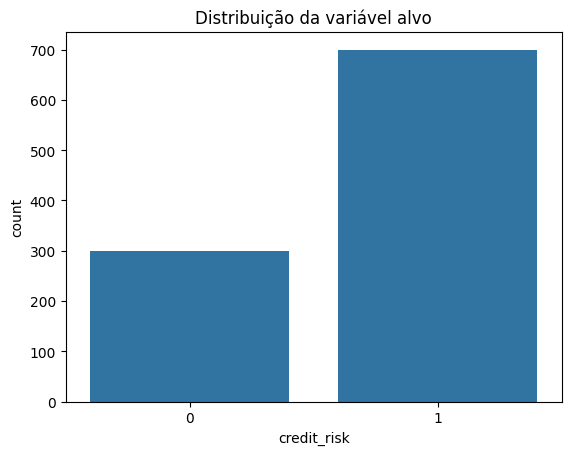

In [4]:
# Exemplo: distribuição da variável alvo
sns.countplot(x='credit_risk', data=df)
plt.title('Distribuição da variável alvo')
plt.show()


In [17]:
df

checking_account  duration_month  credit_history  purpose  credit_amount  \
0                   1              18               4        2           1049   
1                   1               9               4        0           2799   
2                   2              12               2        9            841   
3                   1              12               4        0           2122   
4                   1              12               4        0           2171   
..                ...             ...             ...      ...            ...   
995                 1              24               2        3           1987   
996                 1              24               2        0           2303   
997                 4              21               4        0          12680   
998                 2              12               2        3           6468   
999                 1              30               2        2           6350   

     savings_account  employment_duration  installment_rate  \
0                  1                    2                 4   
1                  1                    3                 2   
2                  2                    4                 2   
3                  1                    3                 3   
4                  1                    3                 4   
..               ...                  ...               ...   
995                1                    3                 2   
996                1                    5                 4   
997                5                    5                 4   
998                5                    1                 2   
999                5                    5                 4   

     personal_status_sex  guarantor  ...  property  age  \
0                      2          1  ...         2   21   
1                      3          1  ...         1   36   
2                      2          1  ...         1   23   
3                      3          1  ...         1   39   
4                      3          1  ...         2   38   
..                   ...        ...  ...       ...  ...   
995                    3          1  ...         1   21   
996                    3          2  ...         1   45   
997                    3          1  ...         4   30   
998                    3          1  ...         4   52   
999                    3          1  ...         2   31   

     other_installment_plans  housing  number_existing_credits  job  \
0                          3        1                        1    3   
1                          3        1                        2    3   
2                          3        1                        1    2   
3                          3        1                        2    2   
4                          1        2                        2    2   
..                       ...      ...                      ...  ...   
995                        3        1                        1    2   
996                        3        2                        1    3   
997                        3        3                        1    4   
998                        3        2                        1    4   
999                        3        2                        1    3   

     num_dependents  telephone  foreign_worker  credit_risk  
0                 2          1               2            1  
1                 1          1               2            1  
2                 2          1               2            1  
3                 1          1               1            1  
4                 2          1               1            1  
..              ...        ...             ...          ...  
995               1          1               2            0  
996               2          1               2            0  
997               2          2               2            0  
998               2          2               2            0  
999               2          1 

In [5]:

profile = ProfileReport(df, title="Profiling Report",explorative=True)
profile.to_file("./../reports/raw_data.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 33.82it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]